# Extracting Fluorescent Time Series Data
- with Analytical Neural Time Series (ANTS) - 
In the case of measuring phase lags from cluster to neighbors


In [52]:
# from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3
# %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
from tkinter import filedialog, Tk 

#automate the boring stuff
import time, os, sys, re
beep = lambda x: os.system("echo -n '\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
print('notebook is at: ' + nb_dir)

github_path = "/Users/timothytyree/Documents/GitHub/optical_flow/notebooks"
sys.path.insert(0, github_path)
from lib import *
from lib.optical_flow import *
from lib.utils_fluorescence import *
from lib.utils import *
import cv2
from scipy.ndimage import maximum_filter
from scipy.signal import detrend

# load the autoreload extension
%load_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

notebook is at: /Users/timothytyree/Documents/GitHub/optical_flow/notebooks
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

In [54]:
# #TODO: rerun all ouput scripts using this log ratio of the raw fluorescent intensity
# #TODO: import the relevant fret signal and overlay with green, for example
# save_folder = "/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/Responses to Reviewers"
# os.chdir(save_folder)
# os.chdir(data_dir)
# cluster_dir = 'cluster_trajectory_091019_pos_4.csv'
# fret_dir = 'Capture 1 - Position 4_XY1568139231_Z0_T000_C1.tif'
# fid_frames= pims.TiffStack_libtiff(fret_dir)
# fid = fid_frames[frm] - 1000
# fid = np.log(fid_frames[frm]/1000)
# green_filter = 1 + fid
# #the background appears to be roughly 1000 in numerical value

## load file_namespace for Fig. 5 (load the token 10X DTT) 
- just remake the timeseries plot.  don't bother annotating, you'll just redo it in openoffice draw

In [55]:
#fig. 5 data (DTT experiment) 
# Cap 1 pos 0 and 4: 10mM DTT added after 129 Frame
time_between_2_frames = 1. # = 60 seconds
spatial_resolution = 1.33333 # microns/pixel
frameno_origin = 129 # frame number
r1=100 # pixels and not microns? for measuring mean_CI savefig file_name
r2=200 # pixels and not microns?

dt = time_between_2_frames # 1.0 #minutes between frames
lamda = spatial_resolution# 3.7313  #micron/pixel
time_origin_frameno = frameno_origin # 50
shift_to_apparent_t0 = 0 # apparent time origin matches recorded dispensory time
ylim2 = None # [0, .07]
vmin = -(vmax := 4)

trial_str = '121719_pos_7'
data_dir = '/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/experiment_with_DTT/10X/121719/'
save_folder = "/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/Responses to Reviewers/fig"
# os.chdir(data_dir)
cluster_dir =  f"cluster_{trial_str}.csv"#cluster_dir = "cluster_121719_pos_7.csv"
dic_dir = 'Capture 1 - Position 7_XY1576607044_Z0_T000_C0.tif'
# Caution! fret_dir is a *.tif, not a *.csv.  fret_fn stores averaged fluorescence DataFrames in a *.csv file
fret_dir = "Capture 1 - Position 7_XY1576607044_Z0_T000_C1.tif"
fret_fn = f'fluorescence_{trial_str}_from_aggregate_dist1_{int(r1/lamda)}_dist2_{int(r2/lamda)}.csv'

fret_fn = f'fluorescence_{trial_str}_from_aggregate_dist1_{int(r1/lamda)}_dist2_{int(r2/lamda)}.csv'

file_name_radial = f"flow_radial_{trial_str}.tiff"#search_for_file(data_dir)
# save_file_name_CI = fret_fn.replace('fluorescence_',f"mean_CI_dist1_{int(r1/lamda)}_dist2_{int(r2/lamda)}_").replace('.csv','.png')
# save_file_name = fret_fn.replace('fluorescence_',f"outward_motion_").replace('.csv','.png')
tmp_dir = data_dir + 'tmp/'
tmp2_dir = data_dir + 'tmp2/'
tmp2d2_dir = data_dir + 'tmp2d2/'

In [56]:
kwargs = {
    'dt':1.,
    'lamda':1.33,
    'time_origin_frameno':129,
     'vmin':vmin,
     'vmax':vmax,
     "mydpi":512/10
}
kwargs.update({'data_dir':data_dir,
'cluster_dir':cluster_dir,
"dic_dir":dic_dir,
"tmp_dir":tmp_dir,
"tmp2_dir":tmp2_dir,              
"tmp2d2_dir":tmp2d2_dir})

In [45]:
#(deprecated) #fig. 5 data (DTT experiment)
# dic_dir = '/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/experiment_with_DTT/4X/122019-2/Capture 1 - Position 12_XY1576876376_Z0_T000_C0.tif'
# fret_dir = '/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/experiment_with_DTT/4X/122019-2/Capture 1 - Position 12_XY1576876376_Z0_T000_C1.tif'
# data_dir = '/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/experiment_with_DTT/4X/122019-2/'
# os.chdir(data_dir)
# file_name_radial = 'flow_radial_122019-2_pos12_top_right.tiff'
# cluster_dir = "cluster_122019-2_pos12_top_right_cubic_spline.csv"
# dt = 1.0 #minutes between frames
# lamda = 3.7313  #micron/pixel
# time_origin_frameno = 50

# load fig. 6 data

In [50]:
# #fig. 6 data (PDE1 experiment)
# data_dir = '/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/PDE_experiment_new/091019/'
# os.chdir(data_dir)
# cluster_dir = 'cluster_trajectory_091019_pos_4.csv'
# fret_dir = 'Capture 1 - Position 4_XY1568139231_Z0_T000_C1.tif'
# dic_dir = 'Capture 1 - Position 4_XY1568139231_Z0_T000_C0.tif'
# file_name_radial = 'flow_radial_091019_pos_4.tiff'
# dt = 1.0 #minutes between frames
# lamda = 1.33  #micron/pixel
# time_origin_frameno = 37


## (ignore) use apparently not working automated timeseries results

## import the timeseries data

In [47]:
# print('select the results_r1_{}_r2_{} csv file as desired.')
# path = search_for_frame_path(os.getcwd())

In [48]:
!Pwd

/Users/timothytyree/Documents/GitHub/optical_flow/notebooks


In [51]:
# for comparing multiple fret channels
#channel A is the center of the cluster
df_A = pd.read_csv(get_timeseries_filename(0,10))

#channel B is the perifery of the cluster
df_B = pd.read_csv(get_timeseries_filename(10,40))

# channel C is the disconnected neighboring cells
df_C = pd.read_csv(get_timeseries_filename(75,100))

# channel D is the disconnected neighboring cells further still
df_D = pd.read_csv(get_timeseries_filename(100,200))

t_values = df_A.t.values.copy()

FileNotFoundError: [Errno 2] File results_r1_0_r2_10_navg_1_08042020 c2P1.csv does not exist: 'results_r1_0_r2_10_navg_1_08042020 c2P1.csv'

## visualize the signals
PROBLEM: Spikes should be visually apparent. Here, they instead look like gibberish...

if they are not, go back and extract the signals more carefully.  make a histogram of intensity values and test/justify the signal measure.
- TODO: normalize them wrt their own baselines.  

In [31]:
plt.plot(df_A.t,df_A.fret, label='channel A')
plt.plot(df_B.t,df_B.fret, label='channel B')
plt.plot(df_C.t,df_C.fret, label='channel C')
plt.plot(df_D.t,df_D.fret, label='channel D')
plt.xlim([60,80])
plt.legend()

NameError: name 'df_A' is not defined

# measure the fluor. intens. timeseries from scratch

### import raw fluorescence video data


In [290]:
fret_dir = search_for_frame_path(data_dir)
# fret_dir = search_for_frame_path()#data_dir)
print(f"fret_dir = {fret_dir}")



fret_dir = 


In [11]:
cluster_dir = search_for_frame_path(data_dir)
print(f"cluster_dir = {cluster_dir}")

file_name_radial = search_for_frame_path(data_dir)
print(f"file_name_radial = {file_name_radial}")

Frames: /Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/experiment_with_DTT/10X/121719/cluster_121719_pos_7.csv
cluster_dir = /Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/experiment_with_DTT/10X/121719/cluster_121719_pos_7.csv
Frames: /Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/experiment_with_DTT/10X/121719/tmp/preprocessed_snapshot.180.png
file_name_radial = /Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/experiment_with_DTT/10X/121719/tmp/preprocessed_snapshot.180.png


In [29]:
# #TODO: DTT experiment new analysis with sharp optical flow
# # fret_dir = "/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/experiment_with_DTT/4X/122019-2/Capture 1 - Position 12_XY1576876376_Z0_T000_C1.tif"
# # cluster_dir = "/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/experiment_with_DTT/4X/122019-2/cluster_122019-2_pos11_middle_cubic_spline.csv"
# # frames= pims.TiffStack_libtiff(fret_dir)
# # df = pd.read_csv(cluster_dir)

# # print("Did you update the timescale and spatial resolution?")
# # dt = 1.0 #minutes between frames
# # lamda = 1.33  #micron/pixel

# of  = OpticalFlowClient(dt=dt)
# of.lamda = lamda
# frames= pims.TiffStack_libtiff(fret_dir)


In [20]:
# pims.ImageSequence?
# path/to/images/*.png
# file_name_radial = "/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/experiment_with_DTT/10X/121719/tmp/"
# radial = pims.TiffStack_libtiff(file_name_radial)


### visually verify that you have the right data loaded

In [23]:
#check all data sources have the same length
print(len(df.frame.values))
print(frames)
# print(len(radial))

182
<Frames>
Source: /Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/experiment_with_DTT/10X/121719/Capture 1 - Position 7_XY1576607044_Z0_T000_C1.tif
Length: 183 frames
Frame Shape: 512 x 512
Pixel Datatype: uint16


In [222]:
#show r_c_mat  agrees with imageJ
frm = 100
print(df.loc[df.frame==frm])
img = frames[frm]



r_c_mat = radial[frm][...,2]

     Unnamed: 0  frame           x          y
100         100    100  297.346446  227.15202


In [151]:
input_file_name = fret_dir
cluster_dir

'/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/experiment_with_DTT/10X/121719/cluster_121719_pos_7.csv'

In [152]:
# # def input_to_measures ( input_file_name, **kwargs):
# #get frame number, frm, for a given file_name
# lst = input_file_name.split('.')
# assert(len(lst)>2)
# frm = int(eval(lst[-2]))
# #only consider frames with a history, so that we may calculate optical flow
# if frm<=1:
#     return None
#import images    
frm = 7
# current, previous, previous_previous = load_input_grayscale_data_second_order(input_file_name)
# import the aggregate's trajectory
os.chdir(kwargs['data_dir'])
df = pd.read_csv(kwargs['cluster_dir'])
position = df.loc[df.frame==frm][['x','y']].values.T

of  = OpticalFlowClient(dt=dt)
of.lamda = lamda
frames= pims.TiffStack_libtiff(fret_dir)


In [223]:
# #matrix of distances from the cluster
# xpos,ypos = df.head(1).values.T[2:]
# position=(xpos,ypos)
# r_hat_mat, r_c_mat = of.get_r_hat_mat(position)
# print (position)

In [153]:
def prepare_image(img):
    norm_image = cv2.normalize(img, None, alpha=0., beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return cv2.cvtColor(norm_image,cv2.COLOR_BGR2GRAY)

In [154]:
#functionally get the sharp area_channel
def get_sharp_area_channel(frm, **kwargs):
    '''Example Usage:
    area_channel = get_sharp_area_channel(frm, tmp_dir=None, **kwargs)
    '''
    if tmp_dir is not None:
        os.chdir(tmp_dir)
    file_name_area = lambda frm: f"preprocessed_snapshot.{frm}.png" 
    img = plt.imread(file_name_area(frm))
    img = img[...,0].astype('uint8')
    area_channel  = img
    return area_channel

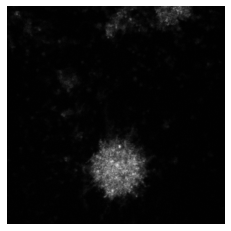

In [155]:
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

The histogram of intensities for several frames supports the mean and median as stable measures of average intensity sampled from these cells.

In [156]:
# frm = 334
# i_values = np.array(frames[frm])[boo]
# plt.hist(i_values)
# plt.title(f"frame no = {frm}")
# plt.show()
# time_origin_frameno = 37#50
df['t'] = dt * (df.frame.values - time_origin_frameno)
t_values = df.t.values
print('Did you check "Note.txt" for the correct onset frame?')
print(f'Is ^that indeed time_origin_frameno = {time_origin_frameno:2d}?')

Did you check "Note.txt" for the correct onset frame?
Is ^that indeed time_origin_frameno = 129?


In [157]:
# #check intensity histogram for a stable measure
# # rad =5
# # kernel = np.ones((rad,rad),np.uint8)
# # dilation = cv2.dilate(img,kernel,iterations = 1)
# # erosion  = cv2.erode (dilation,kernel,iterations = 4)
# # boo_frm = (boo & (erosion.astype(bool)))
# # i_values = np.array(maximum_filter(frames[frm], size = 2))[boo_frm]
# # # boo_frm = (boo & (img.astype(bool)))
# # # boo_frm = (boo & (dilation.astype(bool)))
# # # i_values = np.array(frames[frm])[boo_frm]
# plt.hist(i_values, bins=30)
# plt.show()

In [158]:
# #a different dtt experiment with pulses that cease.
# dt = 1 #minute between each frame. verified.
# lamda = 3.7313 #microns per pixel. verified.
# dic_dir  = '/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/experiment_with_DTT/4X/122019-2/Capture 1 - Position 12_XY1576876376_Z0_T000_C0.tif'
# fret_dir = '/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/experiment_with_DTT/4X/122019-2/Capture 1 - Position 12_XY1576876376_Z0_T000_C1.tif'
# cluster_dir = '/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/experiment_with_DTT/4X/122019/122019_pos1/cluster_122019_pos1_middle_cubic_spline.csv'
# data_dir = '/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/experiment_with_DTT/4X/122019/122019_pos1/'
# # df_dir = cluster_dir

### measure the fluorescence channels

In [159]:
# #load raw dic data
# os.chdir(dic_dir[:len(dic_dir)-dic_dir[::-1].find('/')])
# @pims.pipeline
# def gray(image):
#     return np.uint8(image[:, :, 1])  # Take just the green channel
# frames= pims.TiffStack_libtiff(dic_dir)
# #load raw fret data
# @pims.pipeline
# def max_filter(image):
#     return np.uint8(maximum(image, disk(3)))  #rad=3 pixel filter radius

# fret_frames_unfiltered= pims.TiffStack_libtiff(fret_dir)
# # fret_frames_unfiltered = pims.TiffStack(fret_dir)
# #caution: this line is not equivalent to below: fret_frames = pims.TiffStack(fret_dir, process_func = max_filter)
# #the following is slow but appears necessary to get nice 
# # fret_frames = [max_filter(img) for img in fret_frames]#TODO: set verbose to false.  it prints a lot when there's a large number of bins
# fret_frames = []
# for img in fret_frames_unfiltered:
#     fret_frames.append(img)
    
# df = pd.read_csv(cluster_dir)

# radial[len(radial)-1]
# radial[0]
# r_c_mat = radial[frm][...,2]

In [160]:
# of.get_r_hat_mat?

In [161]:
df.loc[df.frame==frm]
frm
area_channel

array([[0, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [253]:
#compute channel A
dist_1 = 0#microns
dist_2 = 20#microns
use_max_filter = True
use_cell_area_filter = True

r1 = dist_1/lamda#pixels
r2 = dist_2/lamda#pixels
medi_list = []
# for frm in range(len(radial)):
for frm in range(1,len(frames)-1):
    # get boolean cell area
    area_channel = get_sharp_area_channel(frm, **kwargs)
    
    #get position
    os.chdir(kwargs['data_dir'])
    df = pd.read_csv(kwargs['cluster_dir'])
    position = df.loc[df.frame==frm][['x','y']].values.T
    x_coord = position[1]
    y_coord = position[0]
    r_hat_mat, r_c_mat = of.get_r_hat_mat([x_coord,y_coord])
    #     r_c_mat = radial[frm][...,2]
    # compute annulus mask from cluster trajectory
    position = tuple(df.iloc[frm][['x','y']].values)
    r_hat_mat, r_c_mat = of.get_r_hat_mat(position=position)
    #boolean annulus
    boo = r_c_mat<r2
    boo &= r_c_mat>r1
    
    # compute mean fluorescent intensity
    # method : morphologically dilate, then erode, then sample there after performing a maximum filter with a wide radius
    if use_cell_area_filter:
        rad =5
        kernel = np.ones((rad,rad),np.uint8)
        dilation = cv2.dilate(img,kernel,iterations = 1)
        erosion  = cv2.erode (dilation,kernel,iterations = 1)
        boo_frm = (boo & (erosion.astype(bool)))
    else: #nocellareafilter
        boo_frm = (boo & (img.astype(bool)))
    if use_max_filter:
        i_values = np.array(maximum_filter(frames[frm], size = 10))[boo_frm]
    else: #nomaxfilter     
        i_values = np.array(frames[frm])[boo_frm]
    medi_list.append(np.mean(i_values))
chnl_A = np.array(medi_list)
region_A = boo.copy()
print(f"dist_1 = {r1*lamda:.1f}\tdist_1 = {r2*lamda:.1f} microns.")

dist_1 = 0.0	dist_1 = 20.0 microns.


In [270]:
#compute channel B
dist_1 = 100#120#microns
dist_2 = 200#200#microns
use_max_filter = True
use_cell_area_filter = True

r1 = dist_1/lamda#pixels
r2 = dist_2/lamda#pixels
medi_list = []
# for frm in range(len(radial)):
for frm in range(1,len(frames)-1):
    # get boolean cell area
    area_channel = get_sharp_area_channel(frm, **kwargs)
    
    #get position
    os.chdir(kwargs['data_dir'])
    df = pd.read_csv(kwargs['cluster_dir'])
    position = df.loc[df.frame==frm][['x','y']].values.T
    x_coord = position[1]
    y_coord = position[0]
    r_hat_mat, r_c_mat = of.get_r_hat_mat([x_coord,y_coord])
    #     r_c_mat = radial[frm][...,2]
    # compute annulus mask from cluster trajectory
    position = tuple(df.iloc[frm][['x','y']].values)
    r_hat_mat, r_c_mat = of.get_r_hat_mat(position=position)
    #boolean annulus
    boo = r_c_mat<r2
    boo &= r_c_mat>r1
    
    # compute mean fluorescent intensity
    # method : morphologically dilate, then erode, then sample there after performing a maximum filter with a wide radius
    if use_cell_area_filter:
        rad =5
        kernel = np.ones((rad,rad),np.uint8)
        dilation = cv2.dilate(img,kernel,iterations = 1)
        erosion  = cv2.erode (dilation,kernel,iterations = 1)
        boo_frm = (boo & (erosion.astype(bool)))
    else: #nocellareafilter
        boo_frm = (boo & (img.astype(bool)))
    if use_max_filter:
        i_values = np.array(maximum_filter(frames[frm], size = 10))[boo_frm]
    else: #nomaxfilter     
        i_values = np.array(frames[frm])[boo_frm]
    medi_list.append(np.mean(i_values))
chnl_B = np.array(medi_list)
region_B = boo.copy()
print(f"dist_1 = {r1*lamda:.1f}\tdist_1 = {r2*lamda:.1f} microns.")

dist_1 = 100.0	dist_1 = 200.0 microns.


In [271]:
df['chnl_B'] = np.concatenate([[np.nan], chnl_B])
df['t'] = kwargs['dt'] * (df.frame.values - kwargs['time_origin_frameno'])
# dA = detrend(df.dropna()['chnl_A'])
dB = df.dropna()['chnl_B']
t_values = df.dropna()['t'].values

In [272]:
df['chnl_A'] = np.concatenate([[np.nan], chnl_A])
df['t'] = kwargs['dt'] * (df.frame.values - kwargs['time_origin_frameno'])
# dA = detrend(df.dropna()['chnl_A'])
dA = df.dropna()['chnl_A']
t_values = df.dropna()['t'].values

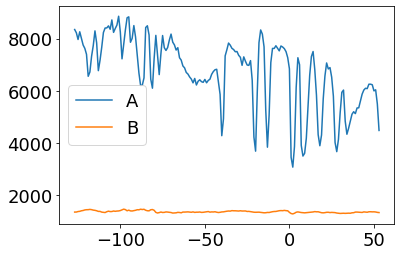

In [273]:
plt.plot(t_values, dA, label='A')
plt.plot(t_values, dB, label='B')
plt.legend()

### making a figure to show the regions
- sanity check

In [274]:
#choose to view any frame number, frm
frm=-1#int(time_origin_frameno-45*dt)

position = tuple(df.iloc[frm][['x','y']].values)
r_hat_mat, r_c_mat = of.get_r_hat_mat(position=position)


img = frames[frm]
norm_image = cv2.normalize(img, None, alpha=0., beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
image = cv2.cvtColor(norm_image,cv2.COLOR_GRAY2BGR)

image[...,0][region_A] *= 2 #double red channel
image[...,1][region_B] *= 2 #double green channel

#simple scale bar
l = int(50/lamda)
image = cv.rectangle(image,(400,40),(400+l,30),(255,255,255),-1)

#clip to max values
image = np.minimum(image,1.)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


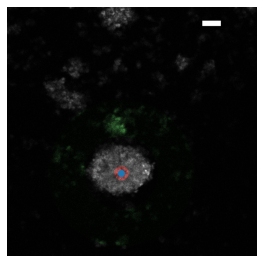

In [275]:
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(image)
# ax.imshow(r_c_mat<r2)
ax.axis  ('off')
ax.scatter(x = [position[0]], y = [position[1]])
plt.tight_layout()
plt.show()
# os.chdir(save_folder)
# fig.savefig('regions.jpg',dpi=300)

In [276]:
#plot several channels as a function of time
# save = False
# t_values = np.arange(651)*dt
# fontsize = 18
# fig, ax = plt.subplots(figsize=(5,5))
# # ax.plot(t_values,chnl_A, c='r', label='0-10 µm')
# # ax.plot(t_values,chnl_B, c='g', label='50-60 µm')
# # ax.plot(t_values[:-1],chnl_C, c='b', label='100-200 µm')
# ax.plot(t_values,chnl_A, c='r', label='0-10 µm')
# # ax.plot(t_values,chnl_B, c='g', label='20-40 µm')
# ax.plot(t_values[:-1],chnl_B, c='g', label='100-140 µm')
# ax.plot(t_values[:-1],chnl_C, c='b', label='160-200 µm')

# ax.set_xlim([0,80])
# ax.legend(fontsize=fontsize)
# ax.set_xlabel('time (min)', fontsize=fontsize)
# ax.set_ylabel('fluor. intensity (A.U.)',fontsize=fontsize)

# plt.xticks(fontsize= fontsize)
# plt.yticks(fontsize= fontsize)
# ax.set_ylim(0,1.2*10**4)
# plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))#, fontsize=fontsize)
# if save:
#     os.chdir(save_folder)
#     plt.tight_layout()
#     fig.savefig('raw_timeseries.png',dpi=300)
# else:
#     plt.show()

### save the raw time series

In [277]:
df_save_dir = cluster_dir.replace('cluster','fluorescence').replace('.csv',f'_dist1_0,100_dist2_20,200.csv')
df.to_csv(df_save_dir, index=False)  
print(df_save_dir)


/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/experiment_with_DTT/10X/121719/fluorescence_121719_pos_7_dist1_0,100_dist2_20,200.csv


In [39]:
df_dir = df_save_dir

NameError: name 'df_save_dir' is not defined

# Analysis of Neural Time Series


1. detrend/normalize it
1. isolate the "epoch" of the 4 concentric pulses originating in the cluster
1. compute the cross correlation functions 
1. measure the phase lag
1. plot the outward optical flow versus time

In [58]:
# save_folder = '/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/Responses to Reviewers/fig'
# df_dir = '/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/experiment_with_DTT/10X/121719/fluorescence_121719_pos_7_dist1_0,100_dist2_20,200.csv'

In [59]:
# file_name = search_for_frame_path(data_dir)
folder = "/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/Richa's High Time Resolution Experiment/Data/"
os.chdir(folder)


In [60]:
df_dir = search_for_frame_path(os.getcwd())

Frames: /Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/Richa's High Time Resolution Experiment/Data/raw_timeseries.csv


In [61]:
from scipy.signal import detrend
from scipy import signal

In [73]:
df = pd.read_csv(df_dir)
# df = df.loc[(df.t>=15) & (df.t<=80)]
df.dropna(inplace=True)

In [74]:
dA = detrend(df['chnl_A'])
dB = detrend(df['chnl_B'])
dC = detrend(df['chnl_C'])

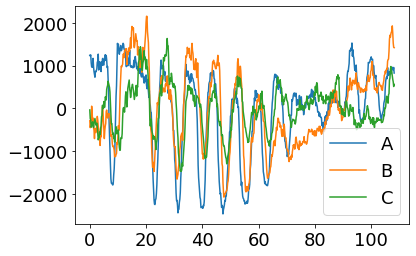

In [75]:
t_values = df['t'].values
plt.plot(t_values, dA, label='A')
plt.plot(t_values, 5.*dB, label='B')
plt.plot(t_values, 5.*dC, label='C')
plt.legend()
# plt.xlim([25,80])

In [76]:
# plt.plot(abs(signal.hilbert2(dA)).T)
# plt.plot(abs(signal.hilbert2(dB)).T)
# plt.plot(abs(signal.hilbert2(dC)).T)


## normalize each signal by setting the last 5 minutes.  detrend


In [77]:
# norm then detrend
# A0,B0 = df.tail(5).mean()[['chnl_A','chnl_B']].values
A0,B0,C0=df.loc[df.t>75].mean().values[-3:]
df['logA'] = np.log(df['chnl_A']/A0)
df['logB'] = np.log(df['chnl_B']/B0)
df['logC'] = np.log(df['chnl_C']/C0)
dlA = detrend(df['logA'])
dlB = detrend(df['logB'])
dlC = detrend(df['logC'])

# #detrend then norm doesn't work because detrended values can be negative
# df['dA'] = detrend(df['chnl_A'])
# df['dB'] = detrend(df['chnl_B'])
# df['dC'] = detrend(df['chnl_C'])
# A0,B0,C0=df.loc[df.t>75].mean()[['dA','dB','dC']].values
# dlA = np.log(df['dA']/A0)
# dlB = np.log(df['dB']/B0)
# dlC = np.log(df['dC']/C0)

In [78]:
# dA = detrend(df['chnl_A'])
# dB = detrend(df['chnl_B'])
# dC = detrend(df['chnl_C'])
# A0,B0,C0=df.loc[df.t>75].mean().values[-3:]

# df['logA'] = np.log(df['chnl_A']/A0)
# df['logB'] = np.log(df['chnl_B']/B0)
# df['logC'] = np.log(df['chnl_C']/C0)

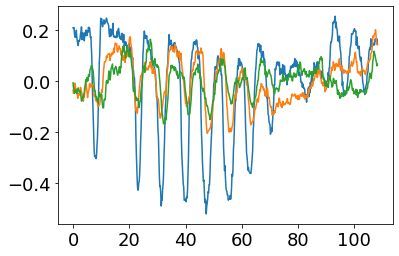

In [79]:
plt.plot(t_values, dlA)
plt.plot(t_values, dlB)
plt.plot(t_values, dlC)

# plt.plot(t_values, df['logA'])
# plt.plot(t_values, df['logB'])

# plt.plot(t_values, df['logC'])
# plt.xlim([25,80])

In [89]:
t_values[-1]

# plt.plot(t_values, dlA, c='r')
# plt.plot(t_values, dlB, c='g')
# # plt.plot(t_values, dlC, c='b')
# plt.xlabel('time (min)')
# # plt.xlim([35,67])
# plt.xlim([35,53])

# plt.ylabel('fluor. intens.\n normed, detrended')
# plt.tight_layout()
# # plt.savefig('detrended_timeseries.png', dpi=300)

108.16666666666666

# compute cross correlations between the signals

In [112]:
# 1. detrend/normalize it
boot = (t_values>35)# & (t_values<65)
# boot = (t_values>30) & (t_values<80)
signal_A = dlA[boot]
signal_B = dlB[boot]
signal_C = dlC[boot]


#detrend 
signal_A = signal.detrend(signal_A)
signal_B = signal.detrend(signal_B)
signal_C = signal.detrend(signal_C)

#formally normalize
signal_A /= np.linalg.norm(signal_A)
signal_B /= np.linalg.norm(signal_B)
signal_C /= np.linalg.norm(signal_C)



In [113]:
#compute the cross correlation
ccAB = signal.correlate(signal_B,signal_A)
ccAC = signal.correlate(signal_C,signal_A)
ccBC = signal.correlate(signal_C,signal_B)

ln = ccAB.shape[0]
dt = float(1/6)
tau_values = np.arange(-ln/2,ln/2,1)*dt+dt/2
cor_values = ccAB.copy()

#compute the apparent delay
delay = tau_values[np.argmax(ccAB)]*60
print(f'the time delay from region A to region B is {delay:.0f} seconds.')
delay = tau_values[np.argmax(ccAC)]*60
print(f'the time delay from region A to region C is {delay:.0f} seconds.')
delay = tau_values[np.argmax(ccBC)]*60
print(f'the time delay from region B to region C is {delay:.0f} seconds.')

the time delay from region A to region B is 50 seconds.
the time delay from region A to region C is 60 seconds.
the time delay from region B to region C is 0 seconds.


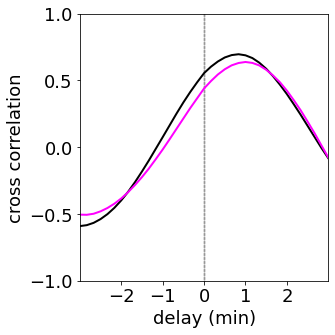

In [107]:

#horrizontal line to mark zero
y_values = np.arange(-12,14,.01)
x_values = 0.*y_values
fig = plt.figure(figsize = (5, 5))#num=None, frameon=True, figsize=(mult*512/mydpi, mult*512/mydpi), dpi=mydpi, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.plot(tau_values, ccAB, c='k', lw=2)
ax.plot(tau_values, ccAC, c='magenta', lw=2)
# plt.plot(tau_values, ccBC)


# plt.subplots(figsize=(5,5))
ax.scatter(x=x_values, y=y_values, c='gray', s=1, alpha=0.5)

# plt.xlim([-10,10])
ax.set_xlim([-3,3])
ax.set_ylim([-1,1])
ax.set_xticks([-2,-1,0,1,2])

ax.set_xlabel('delay (min)')
ax.set_ylabel('cross correlation')
plt.tight_layout()
# plt.show()
fig.savefig('cross_corr.png', dpi=300)

In [87]:
!pwd

/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/Richa's High Time Resolution Experiment/Data


# (ignore) Distracting notes on measuring causal connections

## DON'T WORRY ABOUT QUANTIFYING CAUSALITY UNTIL I REDO WITH DIFFERENT REGIONS

## TODO: try using the hilbert transform (only on a narrowband signal)
- the real part of the Hilbert transform is a band pass filter
- the square magnitude is the power time series 
- the complex argument is the phase angle of the signal

the transform can be visualized in 3D nicely with x:time, y: Im, z: Re. this is not very interpretable.

## STFT with hann window

In [1026]:
from scipy import signal

In [1039]:
# signal.butter?
signal.stft?

In [1100]:
#short time fourier transform
retval = signal.stft(
    x=chnl_A,
    fs=1.0,
    window='hann',
    nperseg=256,
    noverlap=None,
    nfft=None,
    detrend=False,
    return_onesided=True,
    boundary='zeros',
    padded=True,
    axis=-1,
)

In [1101]:
f,t,Zxx =   retval 

In [1114]:
#example from https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power),
                         size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise


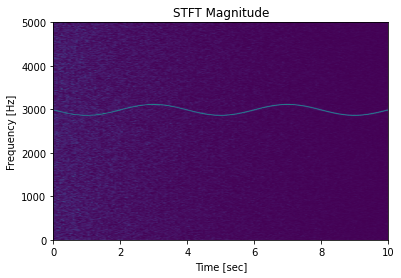

In [1115]:
f, t, Zxx = signal.stft(x, fs, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## measure phase angle difference over time

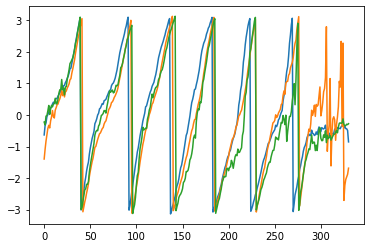

In [1085]:
# plt.plot(chnl_C*10**3*2)
# plt.plot(np.real(signal.hilbert(chnl_C)))
# plt.plot(np.abs(signal.hilbert(chnl_C))**2)
plt.plot(np.angle(signal.hilbert(dlA)), label='channel A')
plt.plot(np.angle(signal.hilbert(dlB)), label='channel B')
plt.plot(np.angle(signal.hilbert(dlC)), label='channel C')

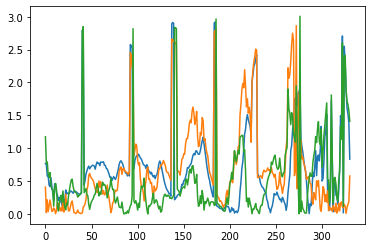

In [1088]:
phaselagAB = np.abs(np.angle(signal.hilbert(dlA))-np.angle(signal.hilbert(dlB)))%(np.pi)
phaselagAC = np.abs(np.angle(signal.hilbert(dlA))-np.angle(signal.hilbert(dlC)))%(np.pi)
phaselagBC = np.abs(np.angle(signal.hilbert(dlB))-np.angle(signal.hilbert(dlC)))%(np.pi)
plt.plot(phaselagAB)
plt.plot(phaselagAC)
plt.plot(phaselagBC)

## measure phase-locking between the signals

## (avoid using) granger causality 
| parameters | $\tau$: time window, $k$:model order<br>
problem: $k$ can vary over time and over different conditions.
- make a univariate/bivariate autoregressive model fit
- plot the error terms over time for the univariate/bivariate models each, $\epsilon(t)$ and $e(t)$
- the granger causality is the log of the ratio of the variance of these errors

$$
GC = log\Big(\frac{Var[e]}{Var[\epsilon]}\Big)
$$
- this measure of causality should be independent of the order of the autoregressive models, $k$.  Plotting $GC$ versus $k$ is a good check for the validity of the measure. 

- An F-test is a statistical test that uses the same models.

- Negative $GC$ means you're doing something wrong.

- Mike X Cohen recommends computing a GC estimate in a small window and then sliding the window to compute GC as a function of time



In [1066]:
!pip install statsmodels

In [1067]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

ModuleNotFoundError: No module named 'statsmodels'

## measure phase angle difference over time
#phase-lag causality
- get the nice signals
    - ( 1)bandpass filter a signal, (2/3) normalize wrt some baseline, (3/2) detrend
- try a morlet wavelet convolution to get phase angles
- visualize the phase difference timeseries.

with the nice signal, this gives a quick check for autocorrelation

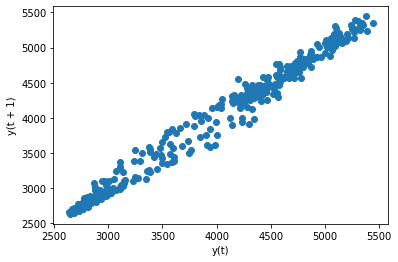

In [1098]:

from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
# series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
# lag_plot(df[['chnl_A','chnl_C']], lag=2)
lag_plot(df['chnl_A'], lag=1)
pyplot.show()

https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

## morlet wavlet decomposition of the timeseries
- extract phase time series
- measure phase lag difference by literally subtracting the time series (mod 2pi)

In [1084]:
# signal.morlet?
signal.morlet2?

In [1081]:
signal.cwt

## Quantifying phase synchronization with phase angle differences
- TODO: make the raw signals into a nice narroband signal
- average phase angles by summing over $\Sigma e^{i\theta}$
- visualize phase angle difference timeseries on an circular/angle plot
    - a cluster of these phase angle difference vectores indicates synchronization.
    
__Inter-site phase clustering__

$$
|m| = \Big|n^{-1} \sum_{t=1}^ne^{i(\theta^j-\theta^k)_t}\Big|
$$

In [1121]:
import statsmodels

ModuleNotFoundError: No module named 'statsmodels'

# Compute the time series Fig. xC and xD given input .csv's

In [2258]:
os.chdir(fret_folder)
df = pd.read_csv(fret_fn).dropna()

In [2259]:
#values to plot for fig. 6C
#raw neighbor fluoresence
os.chdir(data_dir)
df = pd.read_csv(fret_fn_neighbors).dropna()
x2_values = df.t.values
signal_B = df.chnl_A.values

#raw cluster fluoresence
df = pd.read_csv(fret_fn).dropna()
x_values = df.t.values
signal_A = df.chnl_A.values
df['chnl_B'] = signal_B

In [2109]:
#normalize to the first 5 values for each channel
A0,B0=df.iloc[df.index.values[:5]].mean()[['chnl_A','chnl_B']].values
df['logA'] = np.log(df['chnl_A']/A0)
df['logB'] = np.log(df['chnl_B']/B0)
dlA = detrend(df['logA'])
dlB = detrend(df['logB'])

In [2110]:
#TODO: get y-values for in/out flow
# # df_radial_fn = search_for_file(data_dir)
# df_radial_fn = "results_r1_120_r2_200_navg_1_091019_pos_4.csv"


os.chdir(data_dir)
dfr = pd.read_csv(df_radial_fn)


tmax = dfr.t.values[-1]
tmin = dfr.t.values[0]
# x_values = dfr.t.values
# y1_values = dfr['in']/dfr['area']
# y2_values = dfr['out']/dfr['area']


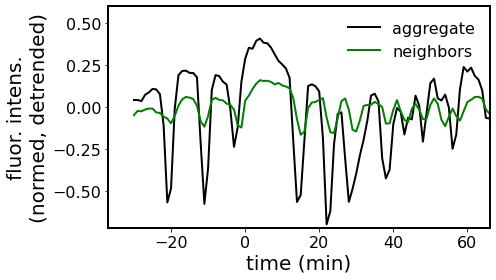

In [2111]:
save = False
save_folder = '/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/Responses to Reviewers/fig'
figsize = (7,4)
fontsize = 20 
line_width = 2

x_values = df.t.values+shift_to_apparent_t0*dt
y1_values = dlA
y2_values = dlB

#plot fig. 6C without annotation
fig, axs = plt.subplots(1,1, figsize = figsize)

#plot data
plt.plot(x_values,y1_values,'k',lw=line_width, label='aggregate')
plt.plot(x_values,y2_values,'g',lw=line_width, label='neighbors')

# #horrizontal line to mark zero
# y_values = np.arange(-12,14,.05)
# x_values = 0.*y_values
# plt.scatter(x=x_values, y=y_values, c='gray', s=1, alpha=0.5)

#format plot
plt.xlabel('time (min)', fontsize=fontsize)
plt.ylabel('fluor. intens.\n(normed, detrended)', fontsize=fontsize)
plt.tick_params(axis='both', which='both', labelsize=fontsize-4)
plt.xlim([tmin,tmax])
plt.legend(fontsize=fontsize-4, loc='upper right', frameon=False)
plt.ylim([-0.72, 0.6])


if not save:
    plt.show()
else:
    fig.tight_layout()
    os.chdir(save_folder)
    fig.savefig(save_fn_1 , dpi = 300)

In [2112]:
#take the 5 min moving average
assert(np.isclose(dfr.t.diff().mean(),1.0))
dfrma = dfr.rolling(5).mean()#.shift(-5)
x_values = dfrma.t.values+shift_to_apparent_t0#6
y1_values = dfrma['in']/dfrma['area']/(lamda*dt)
y2_values = dfrma['out']/dfrma['area']/(lamda*dt)

how many frames after dose before a spike from the aggergate? 8 minutes from frame 37.  That's what Richa says.  Looking at the raw data, the cluster clearly begins its response earlier, perhaps no more than 6 frames earlier.  This justifies the time shift plotted.

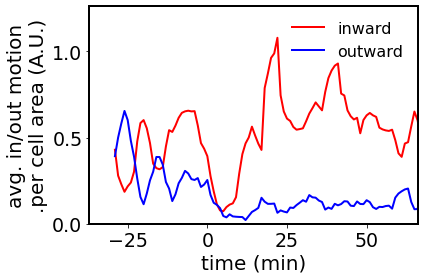

In [2113]:
#TODO: remake plots for fig. 6D without annotation
save = False
save_folder = '/Users/timothytyree/Desktop/Research/Rappel/Dicty. Dispersal/Responses to Reviewers/fig'
figsize = (6,4)
fontsize = 20 
line_width = 2

#plot fig. 6C without annotation
fig, axs = plt.subplots(1,1, figsize = figsize)

#plot data
plt.plot(x_values,y1_values,'r',lw=line_width, label = 'inward')
plt.plot(x_values,y2_values,'b',lw=line_width, label = 'outward')

# #horrizontal line to mark zero
# yl_values = np.arange(-12,14,.05)
# xl_values = 0.*yl_values
# plt.scatter(x=xl_values, y=yl_values, c='gray', s=1, alpha=0.5)


#format plot
plt.xlabel('time (min)', fontsize=fontsize)
plt.ylabel('avg. in/out motion\n.per cell area (A.U.)', fontsize=fontsize)
plt.tick_params(axis='both', which='both', labelsize=fontsize-1)
plt.xlim([tmin,tmax])
plt.legend(fontsize=fontsize-4, loc='upper right', frameon=False)

plt.ylim(ylim2)



if not save:
    plt.show()
else:
    fig.tight_layout()
    os.chdir(save_folder)
    fig.savefig(save_fn_2 , dpi = 300)

In [2104]:
print(save_fn_2)

fig_5c.png
